In [531]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm
import math as m

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

#from xgboost import XGBClassifier 

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')

In [214]:
#Load Datasets
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")
#tanz_pop = pd.read_csv("Tanzania_pop.csv", delimiter=';')


In [212]:
list(train_data)


['id',
 'amount_tsh',
 'PTR',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [74]:
def density(df):
    tanz_pop = pd.read_csv("Tanzania_pop.csv", delimiter=';')
    df.insert(2,'region_pop', df['region'].map(tanz_pop.set_index('Region')['population']))
    df['density'] = df['population'] / df['region_pop']
    del df['region_pop']
    return df


    


In [98]:
test_data = density(test_data)


0                   Bashay
1                 Kimnyaki
2                     Puma
3                  Mkutano
4             Mbinga Urban
5               Ilkiding'a
6                  Mahenge
7                   Maundo
8                 Mnekachi
9                Siha Kati
10       Machame Kaskazini
11              Ruvu Remit
12                Itunduru
13                 Bupamwa
14                   Mseke
15                 Ndogosi
16                   Kanga
17                  Rangwi
18                 Runzewe
19                  Chaume
20               Vijibweni
21                  Yakobi
22           Mtego wa Noti
23                Naintiri
24                Buchambi
25                   Ikuka
26                Maposeni
27                  Mtumba
28                  Lugulu
29                 Olbolot
               ...        
14820               Lionja
14821    Kibosho Magharibi
14822             Luchingu
14823              Lufilyo
14824               Rudewa
14825              Nandete
1

In [607]:
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")

FileNotFoundError: File b'training_set_values.csv' does not exist

In [401]:
teacher_ratio = pd.read_csv("teacher_data.csv", delimiter=';')
teacher_ratio

,REGION,DISTRICT,WARD,SCHOOL NAME,OWNERSHIP,Std 1 M,Std 1 F,Std 2 M,Std 2 F,Std 3 M,...,Std 7 M,Std 7 F,M,F,All Teachers M,All Teachers F,Qualified Teachers F,Qualified Teachers M,PTR,PQTR
0,ARUSHA,Arusha,Bangata,BANGATA,Government,54.0,34.0,30.0,23.0,41.0,...,23.0,25.0,221.0,175.0,0.0,11.0,0.0,11.0,36.0,18.0
1,ARUSHA,Arusha,Bangata,ENGIKARETI,Government,43.0,39.0,48.0,26.0,41.0,...,12.0,20.0,218.0,194.0,3.0,10.0,3.0,10.0,31.7,20.6
2,ARUSHA,Arusha,Bangata,IKIRWA,Kampuni,13.0,12.0,11.0,9.0,8.0,...,NaN,NaN,49.0,39.0,4.0,3.0,4.0,3.0,12.6,14.7
3,ARUSHA,Arusha,Bangata,MIDAWE,Government,40.0,31.0,46.0,51.0,35.0,...,34.0,22.0,282.0,248.0,2.0,11.0,2.0,11.0,40.8,24.1
4,ARUSHA,Arusha,Bangata,SASI,Government,40.0,40.0,29.0,36.0,26.0,...,32.0,38.0,216.0,230.0,6.0,8.0,6.0,8.0,31.9,27.9
5,ARUSHA,Arusha,Bwawani,BWAWANI,Government,26.0,37.0,38.0,36.0,45.0,...,15.0,25.0,188.0,208.0,4.0,5.0,4.0,5.0,44.0,39.6
6,ARUSHA,Arusha,Bwawani,KIGONGONI,Government,40.0,25.0,30.0,33.0,27.0,...,23.0,14.0,162.0,165.0,4.0,2.0,4.0,2.0,54.5,81.8
7,ARUSHA,Arusha,Bwawani,LAMOLOKI,Government,46.0,55.0,67.0,75.0,38.0,...,26.0,46.0,263.0,318.0,5.0,4.0,5.0,4.0,64.6,72.6
8,ARUSHA,Arusha,Bwawani,MUNGUSHI,Government,37.0,35.0,51.0,73.0,48.0,...,35.0,39.0,264.0,269.0,5.0,5.0,5.0,5.0,53.3,53.3
9,ARUSHA,Arusha,Bwawani,OLOKII,Government,17.0,28.0,16.0,13.0,8.0,...,5.0,17.0,73.0,106.0,1.0,6.0,1.0,6.0,25.6,14.9


In [402]:
teacher_ratio_ward = teacher_ratio.groupby(['WARD']).mean()
teacher_ratio_ward = teacher_ratio_ward.reset_index()
teacher_ratio_region = teacher_ratio.groupby(['REGION']).mean()
teacher_ratio_region = teacher_ratio_region.reset_index()



In [403]:
teacher_ratio_region

,REGION,Std 1 M,Std 1 F,Std 2 M,Std 2 F,Std 3 M,Std 3 F,Std 4 M,Std 4 F,Std 5 M,...,Std 6 F,Std 7 M,Std 7 F,M,F,All Teachers M,All Teachers F,Qualified Teachers F,Qualified Teachers M,PTR
0,ARUSHA,44.845950,41.391766,4.308933e+01,40.645333,37.562584,34.472409,32.812329,30.623288,28.904167,...,28.046043,27.510417,29.388393,2.335504e+02,2.251393e+02,4.805040,8.173740,4.587533,7.742706,35.226790
1,DAR ES SALAAM,83.408960,83.462428,7.692431e+01,77.183406,76.170554,75.631195,64.786136,64.812684,63.047904,...,60.836391,53.641838,58.507132,4.612872e+02,4.704848e+02,7.272727,17.877345,6.982684,17.305916,33.014286
2,DODOMA,62.495460,61.106355,6.251688e+01,61.375325,47.771540,49.347258,39.392388,40.938320,31.332016,...,35.072751,27.106242,33.159363,2.962539e+02,3.133277e+02,4.901554,5.505181,4.809585,5.327720,64.381218
3,GEITA,93.770867,93.625205,1.012167e+02,101.070608,104.177049,101.445902,58.869852,59.098847,44.663880,...,37.607445,31.897611,34.117747,4.669836e+02,4.669051e+02,9.220949,5.430442,9.163666,5.396072,64.987234
4,Grand Total,949241.000000,931876.000000,1.028175e+06,994269.000000,917582.000000,886198.000000,677772.000000,673066.000000,544070.000000,...,511940.000000,454498.000000,502163.000000,5.044524e+06,5.062791e+06,NaN,NaN,NaN,NaN,NaN
5,IRINGA,36.260437,35.208748,4.042942e+01,38.453280,36.192843,35.240557,30.818363,29.894212,26.726908,...,27.468432,25.049281,28.180698,2.177341e+02,2.200357e+02,4.867063,5.916667,4.811508,5.807540,42.585119
6,KAGERA,52.907484,53.229730,7.064271e+01,67.464583,52.370447,50.383975,36.890167,37.275105,29.352261,...,27.201264,23.509574,26.654255,2.888640e+02,2.905597e+02,6.676012,4.413292,6.484943,4.259605,54.547248
7,KATAVI,107.497207,104.296089,1.100838e+02,107.413408,90.648045,87.810056,59.606742,58.707865,40.787709,...,31.341040,29.397661,30.304094,4.663352e+02,4.572737e+02,7.664804,4.631285,7.659218,4.631285,74.385475
8,KIGOMA,63.059908,61.732719,8.003072e+01,77.230415,78.556068,74.941628,49.813846,50.229231,35.606481,...,30.167442,28.599064,30.987520,3.648879e+02,3.591567e+02,6.824615,4.278462,6.729231,4.212308,69.817385
9,KILIMANJARO,22.957011,21.901740,2.564851e+01,23.945529,22.881930,21.250513,19.652850,18.521244,18.352391,...,18.220711,19.453207,19.334385,1.449694e+02,1.395843e+02,2.993871,5.844740,2.927477,5.720123,34.434014


In [404]:
train_data['region'] = train_data['region'].str.lower()
teacher_ratio_region['REGION'] = teacher_ratio_region['REGION'].str.lower()

In [405]:
train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [406]:
teacher_ratio_region.REGION.unique()

array(['arusha', 'dar es salaam', 'dodoma', 'geita', 'grand total',
       'iringa', 'kagera', 'katavi', 'kigoma', 'kilimanjaro', 'lindi',
       'manyara', 'mara', 'mbeya', 'morogoro', 'mtwara', 'mwanza',
       'njombe', 'pwani', 'rukwa', 'ruvuma', 'shinyanga', 'simiyu',
       'singida', 'songwe', 'tabora', 'tanga'], dtype=object)

In [410]:
train_data.region.unique()
train_data1 = train_data.copy()

In [414]:
def adding_PTR(df):
    teacher_ratio = pd.read_csv("teacher_data.csv", delimiter=';')

    teacher_ratio_ward = teacher_ratio.groupby(['WARD']).mean()
    teacher_ratio_ward = teacher_ratio_ward.reset_index()
    teacher_ratio_region = teacher_ratio.groupby(['REGION']).mean()
    teacher_ratio_region = teacher_ratio_region.reset_index()

    train_data['region'] = train_data['region'].str.lower()
    teacher_ratio_region['REGION'] = teacher_ratio_region['REGION'].str.lower()

    train_data.insert(2, 'PTR', train_data['ward'].map(teacher_ratio_ward.set_index('WARD')['PTR']))
    for i in range(0, len(train_data)): 
        if m.isnan(train_data.PTR[i]) == True: 
            train_data.PTR[i] =teacher_ratio_region.PTR[ teacher_ratio_region.REGION == train_data.region[i]]
    return df

    


        

In [415]:
train_data = adding_PTR(train_data)

In [412]:
train_data.isna().sum()

id                           0
amount_tsh                   0
PTR                          0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

0               iringa
1                 mara
2              manyara
3               mtwara
4               kagera
5                tanga
6            shinyanga
7            shinyanga
8               tabora
9               kagera
10               pwani
11              ruvuma
12           shinyanga
13         kilimanjaro
14           shinyanga
15               rukwa
16              iringa
17              iringa
18              mwanza
19              iringa
20              iringa
21           shinyanga
22              iringa
23         kilimanjaro
24              kigoma
25         kilimanjaro
26               lindi
27              kagera
28         kilimanjaro
29         kilimanjaro
             ...      
59370           kigoma
59371        shinyanga
59372           tabora
59373            rukwa
59374        shinyanga
59375            tanga
59376          singida
59377           tabora
59378           iringa
59379           kagera
59380           iringa
59381            tanga
59382      

In [189]:
#np.mean(teacher_ratio[teacher_ratio['WARD'].str.contains('Mbinga')]['PTR'])

In [181]:
#teacher_ratio = teacher_ratio.groupby(['WARD']).mean()
teacher_ratio = teacher_ratio.reset_index()

In [190]:
#test_data.insert(2,'PTR', 0)
#test_data[test_data['PTR'].isnull()]

#def impute(row):
#    lookingFor = row["ward"].split(' ')[0]
#    print("looking for {}".format(lookingFor))
#    print("replacing with")
#    
#    print(np.mean( teacher_ratio[teacher_ratio['WARD'].str.contains(row["ward"]) ]['PTR'] ) )
#    row["ward"] = np.mean( teacher_ratio[teacher_ratio['WARD'].str.contains(lookingFor) ]['PTR'] ) 
                   
#test_data[test_data['PTR'].isnull()] = test_data[test_data['PTR'].isnull()].apply(impute, axis=1)

In [191]:
#test_data[['PTR',"ward"]]

In [610]:
def distance_capital(df):
    tanz_capital= 6.1630, 35.7516
    def haversine(coord1, coord2):
        R = 6372800  # Earth radius in meters
        lat1, lon1 = coord1
        lat2, lon2 = coord2

        phi1, phi2 = m.radians(lat1), m.radians(lat2) 
        dphi       = m.radians(lat2 - lat1)
        dlambda    = m.radians(lon2 - lon1)

        a = m.sin(dphi/2)**2 + \
            m.cos(phi1)*m.cos(phi2)*m.sin(dlambda/2)**2

        return 2*R*m.atan2(m.sqrt(a), m.sqrt(1 - a))
    for i in range(0, len(df)): 
        x = df.latitude[i], df.longitude[i]
        df['distance'][i] = haversine(tanz_capital, x)
    return df

In [611]:
train_data = distance_capital(train_data)
train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Flag_longitude,cluster,distance
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,0,1.784049e+06
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,1,9.317090e+05
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,-1,1.126625e+06
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,2,1.949890e+06
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,3,1.026059e+06
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0,4,1.273536e+06
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0,5,1.135837e+06
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0,5,1.206736e+06
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,0,6,1.302457e+06
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0,3,1.002481e+06


In [435]:
for i in range(0, len(train_data)): 
    x = train_data.latitude[i], train_data.longitude[i]
    train_data['distance'] = haversine(tanz_capital, x)
    

In [436]:
train_data
                   
        

,id,amount_tsh,PTR,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,distance
0,69572,6000.0,45.533333,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1.459527e+06
1,8776,0.0,65.814286,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.459527e+06
2,34310,25.0,45.850000,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1.459527e+06
3,67743,0.0,53.927273,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1.459527e+06
4,19728,0.0,56.600000,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.459527e+06
5,9944,20.0,52.300000,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,1.459527e+06
6,19816,0.0,46.800000,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1.459527e+06
7,54551,0.0,72.440000,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1.459527e+06
8,53934,0.0,43.200000,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,1.459527e+06
9,46144,0.0,42.016667,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1.459527e+06


In [432]:
haversine(tanz_capital, x)

5559033.068152112

In [433]:
x

(38.10404822, -6.74746425)

In [434]:
tanz_capital

(6.163, 35.7516)

In [562]:
#Load Datasets
train_data = pd.read_csv("original_datasets/training_set_values.csv")
train_labels = pd.read_csv("original_datasets/training_set_labels.csv")
test_data = pd.read_csv("original_datasets/test_set_values.csv")


In [503]:
list(train_data)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [504]:
train_data['construction_year'] = train_data['construction_year'].replace({0:np.nan})
train_data.construction_year.isna().sum()

20709

In [505]:
extraction_type = train_data[["construction_year","extraction_type"]]
extraction_type = extraction_type.groupby(['extraction_type']).mean()
extraction_type = extraction_type.reset_index()
extraction_type

,extraction_type,construction_year
0,afridev,2002.316821
1,cemo,2009.000000
2,climax,2012.000000
3,gravity,1995.965949
4,india mark ii,2001.308428
5,india mark iii,2004.126984
6,ksb,1999.250000
7,mono,1992.634541
8,nira/tanira,1999.421166
9,other,1993.136859


In [518]:
def inpute_construction_year(df):
    df['construction_year'] = df['construction_year'].replace({0:np.nan})
    df.construction_year.isna().sum()
    extraction_type = df[["construction_year","extraction_type"]]
    extraction_type = extraction_type.groupby(['extraction_type']).mean()
    extraction_type = extraction_type.reset_index()
    for i in range(0, len(df)): 
        if m.isnan(df.construction_year[i]) == True: 
            df.construction_year[i] =extraction_type.construction_year[ extraction_type.extraction_type == df.extraction_type[i]]
    return df
        

In [519]:
train_data = inpute_construction_year(train_data)

In [520]:
train_data[["construction_year","date_recorded"]]

,construction_year,date_recorded
0,1999.000000,2011-03-14
1,2010.000000,2013-03-06
2,2009.000000,2013-02-25
3,1986.000000,2013-01-28
4,1995.965949,2011-07-13
5,2009.000000,2011-03-13
6,1996.671370,2012-10-01
7,1999.421166,2012-10-09
8,2001.308428,2012-11-03
9,1999.421166,2011-08-03


In [495]:
train_data.date_recorded[1]

'2013-03-06'

In [498]:
for i in range(0, len(train_data)): 
    train_data['date_recorded'][i] = first2(train_data.date_recorded[i])

KeyboardInterrupt: 

In [493]:
train_data.recorded_year.unique()

array(['2011'], dtype=object)

In [ ]:
float()

In [604]:
def clustering(train):

    def cluster(X, labels_true, eps=3, min_samples=30, verbose=False):
        db = DBSCAN(eps=0.1, min_samples=30).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if verbose is True:
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            print("Homogeneity: %0.3f" %
                  metrics.homogeneity_score(labels_true, labels))
            print("Completeness: %0.3f" %
                  metrics.completeness_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.3f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
        return db

    variables = ['longitude', 'latitude']
    db = cluster(train.loc[:, variables], train_labels)
    
    train['cluster'] = db.labels_
    train['cluster'] = train['cluster'].astype('category',copy=False)
    
    return train 

In [567]:
def impute_lat(dataset):
    dataset['latitude'] = dataset['latitude'].replace({-0.00000002:np.nan})
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    lat_mean = dataset['latitude'].mean()
    for i in range(0, len(dataset)): 
        if m.isnan(dataset.latitude[i]) == True:
            for j in ("subvillage", "ward", "lga", "district_code", "region", "basin"):
                if m.isnan(dataset.latitude[dataset[j] == dataset[j].iloc[i]].mean()) == False:
                    dataset.latitude.iloc[i] = dataset.latitude[dataset[j] == dataset[j].iloc[i]].mean()
                    break
                elif j == "basin":
                    dataset.latitude.iloc[i] = lat_mean
    print("latitude imputed with mean")
    return dataset

def fix_latitude(dataset):
    for i in range(0, len(dataset)):
        if dataset.latitude[i] == -0.00000002:
            dataset.latitude[i] = dataset.latitude[dataset['region']==dataset.region[i]].mean()
    print("latitude imputed with mean")
    return dataset

"""
Impute Longitude by the mean of the region

Usage:
train_data = impute_long(train_data)
"""
def impute_long(dataset):
    dataset = flag_impute(dataset,'longitude')
    dataset['longitude'] = dataset['longitude'].replace({0:np.nan})
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    long_mean = dataset['longitude'].mean()
    for i in range(0, len(dataset)): 
        if m.isnan(dataset.longitude[i]) == True:
            for j in ("subvillage", "ward", "lga", "district_code", "region", "basin"):
                if m.isnan(dataset.longitude[dataset[j] == dataset[j].iloc[i]].mean()) == False:
                    dataset.longitude.iloc[i] = dataset.longitude[dataset[j] == dataset[j].iloc[i]].mean()
                    break
                elif j == "basin":
                    dataset.longitude.iloc[i] = long_mean
    print("longitude imputed with mean")
    return dataset

def fix_longitude(dataset):
    for i in range(0, len(dataset)):
        if dataset.longitude[i] == 0:
            dataset.longitude[i] = dataset.longitude[dataset['region']==dataset.region[i]].mean()
    return dataset

def flag_impute(df,column):
    ## This function will add a flagg_column column that flags the 0 before they are imputed
    flag = 'Flag_' + column
    df[flag ] = 0
    df[flag][df[column] == 0] = 1
    return df


In [564]:
train_data = impute_lat(train_data)

latitude imputed with mean


In [565]:
train_data = fix_latitude(train_data)

latitude imputed with mean


In [568]:
train_data = impute_long(train_data)

longitude imputed with mean


In [569]:
train_data = fix_longitude(train_data)

In [595]:
variables = ['longitude', 'latitude']
db = cluster(train_data.loc[:, variables], train_labels)

In [596]:
train_data['cluster'] = db.labels_
train_data['cluster'] = train_data['cluster'].astype('category',copy=False)

In [597]:
clusters = train_data.groupby(['cluster']).count()

In [605]:
train_data = clustering(train_data)

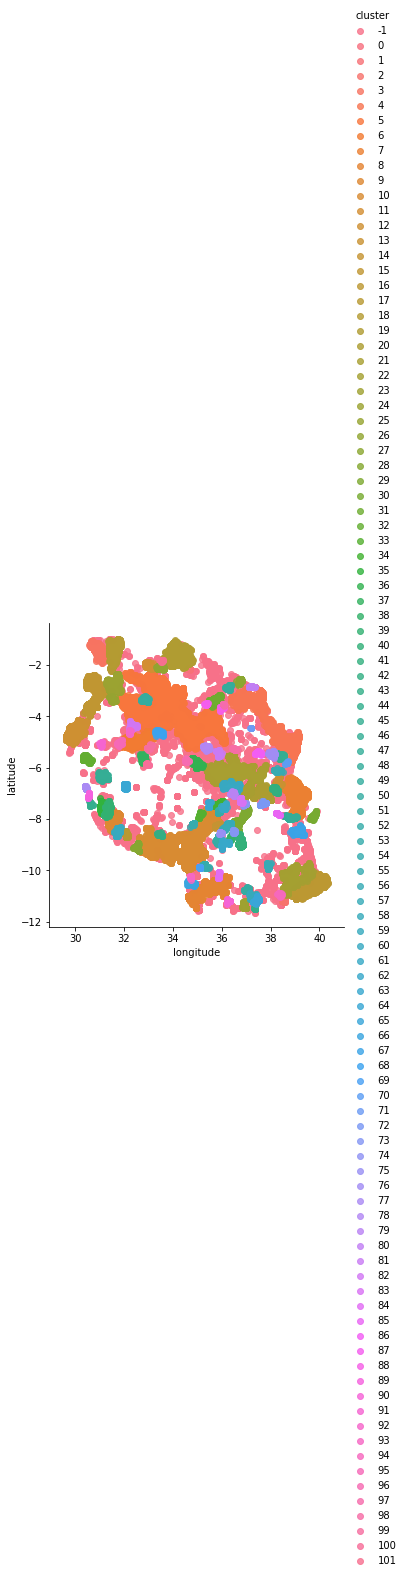

In [606]:
facet = sns.lmplot(data=train_data, x='longitude', y='latitude', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)